# Supervised Learning Models

In this notebook, we present a series of experiments to compare different models that rely on supervised learning for a classification task. 

We will rely on a dataset that contains instances of **UK Traffic Accidents** to attempt to **classify an accident as severe or non-severe given the relevant features in the dataset**. For more details on the preparation of the dataset used here consult the [dataset_prep notebook](dataset_prep.ipynb).

Before evaluating different models, we will introduce the metrics that will be utilized by this purpose. 
We will also present the definition of the concepts of cross validation and grid search, which will also be used to evaluate the studied models.

## Classification Task Metrics

In this section we present the metrics that will be utilized to compare the different models for classification.

**Note:** For more details on the definition of the metrics presented below refer to the scikit learn documentation: [sklearn.metrics Documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

To better understand these metrics, we are going to consider a very simple example related to a classification task. Let's say we have a model trained to identify if the animal in a given picture is or not a dog. The model is evaluated with 100 pictures, from which 40 do contain a dog and 60 do not. From the 40 pictures with a dog, the algorithm correctly classifies 35 of them as containing a dog. From the 60 that do not contain a dog, the algorithm incorrectly classisifes 10 of them as containing a dog.

* 100 pictures
  * 40 have a dog.
    * Model predicts 35 as having a dog.
    * Model predicts 5 as not having a dog.
  * 60 do not have a dog.
    * Model predicts 10 as having a dog.
    * Model predicts 50 as not having a dog.


### Classification Accuracy

The simplest and most widely used method. Represents the ratio of correct to the total number of predictions. Normally presented as a percentage:

$$Accuracy (\%) = 100 * \frac{correct\_predictions}{total\_predictions}$$

For our example scenario, the accuracy would be calculated as below:

$$Accuracy (\%) = 100 * \frac{35 + 50}{100}$$
$$Accuracy = 85\%$$

### Confusion Matrix

A matrix or table that aids visualizing the accuracy of the classification by comparing the *'Truth'* values against the predictions done by the model in a row against column comparison. This will be better understood with the data of our example scenario.

In the rows, we will present the count of predictions done by the model for each of the categories. For the columns, we will present the *'Truth'* count for each of them.

|                        | non-dog Truth | dog Truth |
|------------------------|---------------|-----------|
| **non-dog prediction** |       50      |     5     |
| **dog  prediction**    |       10      |     35    |

A Confusion Matrix from a good classifier will have high numbers in the main diagonal (correct classifications) and low numbers elsewhere. 

### Sensitivity, Recall or True Positive Rate

Aids determining the ability of the model to correctly identify *'True'* values correctly in binary classifications. It can be calculated as the ratio of *'True'* values classified as such (true_positives) to the total number of *'True'* values (true_positives and false_negatives).

Normally presented as a percentage:

$$Sensitivity (\%) = 100 * \frac{true\_positives}{true\_positives + false\_negatives}$$

For our example scenario, the sensitivity would be calculated as below:

$$Sensitivity (\%) = 100 * \frac{35}{35 + 5}$$
$$Sensitivity = 87.5\%$$


### Specificity or True Negative Rate

Aids determining the ability of the model to correctly identify *'False'* values correctly in binary classifications. It can be calculated as the ratio of *'False'* values classified as such (true_negatives) to the total number of *'False'* values (true_negatives and false_positives).

Normally presented as a percentage:

$$Specificity (\%) = 100 * \frac{true\_negatives}{true\_negatives + false\_positives}$$

For our example scenario, the specificity would be calculated as below:

$$specificity (\%) = 100 * \frac{50}{50 + 10}$$
$$specificity = 83.3\%$$


### Precision

It represents the ratio of results correctly identified as *'True'* values to the total number of values classified as *'True'* by the model.

Normally presented as a percentage:

$$Precision (\%) = 100 * \frac{true\_positives}{true\_positives + false\_positives}$$

For our example scenario, the precision would be calculated as below:

$$Precision (\%) = 100 * \frac{35}{35 + 10}$$
$$Precision = 77.8\%$$

### F1 Score

It aids combining the Precision and Recall into a single metric as a harmonic mean of them.

Normally presented as a percentage:

$$F1(\%) = 100 * 2 * \frac{precision * recall}{precision + recall}$$

For our example scenario, the F1-score would be calculated as below:

$$F1 (\%) =  2 * \frac{77.8 * 87.5}{77.8 + 87.5}$$
$$F1 = 82.4\%$$

### Training and Prediction Time

Depending on the application and computational resources available, we may also care about the time it takes to train or fit a model with a given dataset (training time). The prediction time represents the time it takes the model to generate a prediction given a set of features. This latter is typically given for the entire block of instances in the dataset used for testing.

## Cross Validation and Grid Search

Below we present the definition of these concepts, which will be used while evaluating our learning models. For more information, consult the resources below:

[Cross Validation and Grid Search for Model Selection in Python](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/)\
[Cross Validation and Grid Search](https://amueller.github.io/ml-training-intro/slides/03-cross-validation-grid-search.html#1)\
[Cross-Validation and Hyperparameter Tuning: How to Optimise your Machine Learning Model](https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d)\

### Cross Validation

With the standard method, we select a fixed portion of the dataset which is used for testing while the rest is used for training. One potential problem with this approach is that our evaluation is heavily dependent on that fixed selection of the training and testing buckets. With this we have less confidence that our model will perform well when this selection changes.

To deal with this potential problem, cross validation techniques propose evaluating the model with different partitions of the dataset to obtain a better understanding of its ability to generalize. 

The most common technique of this type is known as *K-Fold Cross-Validation*. The process followed with this technique is explained below:

1. The dataset is divided into $k$ groups or folds of equal size.
2. Use $k-1$ of the groups to train the algorithm.
3. Use the remaining group (not used for training) to validate the trained model. Obtain the accuracy and other metrics as needed.
4. Repeat steps 2 and 3 rotating the selection until all the $k$ groups have been used at least once for evaluation.
5. Obtain an average of the accuracy and other metrics used for all the runs. We can also obtain standard deviations to see how stable the model is against these changes.

The image shown below represents this process.

![cross_validation](images/cross_validation.svg "K-Fold Cross Validation")
<center>Image Source: Wikipedia</center>

### Grid Search

As it is already known, most of the models for supervised learning have different hyper-parameters used during the training process that end-up affecting the final performance obtained in the predictions. For example, we require to choose an appropriate number of neighbors to use for a *KNN* model, a regularization value for a *SVM* model, a maximum depth for a *Binary Tree* model, etc. When using grid-search, we will configure an automated algorithm to sweep and combine a series of hyper-parameters that we define, in an attempt to search for the values that would yield better results. 

For example, let's say we have a model that has 2 hyper-parameters used for training called *A* and *B*. *A* is an integer number that can range from 1 to infinite and *B* is a categorical value with 5 different potential values. Let's say we are interested in attempting all the potential values for *B* and only the next values for *A*:

$$A=\{10, 30, 50, 70, 90\}$$

Since we have 5 potential values for *A* and 5 potential values for *B*, the grid search will train and evaluate our algorithm with 25 different combinations in an attempt to find the best among them. As it can be seen, this type of technique will significantly increase the training time.

It is worth mentioning that although cross-validation and grid-search are independent and can be used by themselves, they are particularly powerful when used together.

## Learning Models Evaluation

In this section we present the results of evaluating different learning models for a classification task. More specifically, we will utilize the already processed **UK Accidents Dataset** to attempt to classify an accident as severe or non-severe given the relevant features in the dataset. 

Below we list the classification methods studied in class:

- Logistic Regresion\.
- SVM\.
- kNN\.
- Naive Bayes\.
- Decision Trees\.
- Random Forest\.
- Kernel SVM\.

From these methods we have decided to evaluate *Logistic Regresion*, *SVM*, *Naive Bayes*, *Decision Trees* and *Random Forest*. 

Initially, we discard *kNN* since it can become slow for a relatively big dataset like this one and it might not behave as well since we also have many features (58 in this case). We also discard the *Kernel SVM*, since even through it may provide good predictions, it will also be significantly slower to train given the considerable amount of instances and features.

Besides these models, we will also evaluate the **WHICH ONE** algorithm which was not studied in class. The details of this algorithm are presented in its corresponding section.

For all the algorithms evaluated, we will initially use only cross validation with 5-folds and a metric of accuracy to determine the results. After this, we will combine cross-validation with grid search to attempt to obtain better values for the hyper-parameters. We will present the results of accuracy, confusion matrix, recall, specificity, precision and F1-score for the best configuration obtained for each of the algorithms and the same split of training and testing data. 

### Loading the Dataset

Below we start by importing some of the main python packages that will be used and also by loading the dataset.

In [1]:
# Start by importing relevant python modules
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
# Load accidents Dataset
df_accidents = pd.read_csv('dataset/uk_accidents_for_sev_prediction.csv')

Below we proceed to shuffle the instances to ensure both classes (severe and non-severe) are well distributed.

In [3]:
from sklearn.utils import shuffle
df_accidents = shuffle(df_accidents, random_state=0)

We also proceed to separate the features and target columns into separate data-frames.

In [4]:
# Separate features and target columns
features = df_accidents.drop('Severe_Accident', axis=1)
print("Features shape: {}".format(features.shape))
target = df_accidents['Severe_Accident']
print("Target shape: {}".format(target.shape))

Below we define some generic functions that will be used to evaluate the results of the different models.

In [5]:
def plot_cv_results(cv_results, clf_model):
    """Plot results for cross-validation of classifier."""
    # Create figure with 2 subplots
    fig, (acc_plot, time_plot) = plt.subplots(2, 1)
    fig.suptitle("Cross-Validation Results for '{}'".format(clf_model))
    
    # Create subplot with Accuracy Scores for training and test
    acc_plot.plot(100 * cv_results['train_score'],label='Train Score')
    acc_plot.plot(100 * cv_results['test_score'],label='Test Score')
    acc_plot.set_xlabel("Iteration")
    acc_plot.set_ylabel("Accuracy (%)")
    acc_plot.set_xticks(list(range(len(cv_results) + 1)))
    acc_plot.legend()
    
    # Create subplot with Execution Times
    time_plot.plot(cv_results['fit_time'],label='Training Time')
    time_plot.plot(cv_results['score_time'],label='Testing Prediction Time')
    time_plot.set_xlabel("Iteration")
    time_plot.set_ylabel("Time (s)")
    time_plot.set_xticks(list(range(len(cv_results) + 1)))
    time_plot.legend()
    
    # Display
    plt.show()
    

def cross_validation(clf_model, k=5):
    """Perform cross-validation with the given clf_model and report results."""
    print("-----------------------------------------------------------------------------------------")
    # Run CV
    print(" >>> Running Cross-Validation for model '{}' ...".format(clf_model))
    cv_results = cross_validate(estimator=clf_model, X=features, y=target, cv=k, 
                                scoring='accuracy', return_train_score=True)
    # Generate Plots with Key Results
    plot_cv_results(cv_results, clf_model)
    
    # Print results summary
    print("[Testing]  Accuracy Mean       (%) = {:.3f}".format(100 * cv_results['test_score'].mean()))
    print("[Testing]  Accuracy Std Dev    (%) = {:.3f}".format(100 * cv_results['test_score'].std()))
    print("[Testing]  Execution Time Mean (s) = {:.3f}".format(cv_results['score_time'].mean()))
    print("[Training] Execution Time Mean (s) = {:.3f}".format(cv_results['fit_time'].mean()))
    print("-----------------------------------------------------------------------------------------")
    
    
def grid_search_cv(clf_model, param_grid, k=5):
    """Perform grid search with CV for given classifier model and parameters grid and report results."""
    print(" >>> Running Grid-Search with CV for model '{}' ...".format(clf_model))
    # Configure GS
    gs = GridSearchCV(estimator=clf_model, param_grid=param_grid, scoring='accuracy', cv=k, 
                      verbose=1, n_jobs=-1)
    # Fit on data
    gs.fit(features, target)
    # Print key results
    print(" << Grid-Search Results >>")
    print("Best Parameters Combination: {}".format(gs.best_params_))
    print("Best Accuracy Score:         (%) = {:.3f}".format(100 * gs.best_score_))
    
    return gs.best_estimator_


def seaborn_confusion_matrix(cm, model_name):
    """Generate figure with seaborn confusion matrix."""
    # Create new figure
    plt.figure(figsize=(7,7))
    # We will have custom label for each box with count and percentage
    all_counts = [count for count in cm.flatten()]
    all_percentages = ["{:.3f} (%)".format(100 * perc) for perc in cm.flatten()/np.sum(cm)]
    labels = [f"{count}\n{perc}" for count, perc in zip(all_counts, all_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # Generate heatmap
    tick_labels = ['Non-Severe', 'Severe']
    sns.heatmap(cm, annot=labels, square=True, fmt="", cmap='Reds', 
                xticklabels=tick_labels, yticklabels=tick_labels);
    plt.ylabel('Actual');
    plt.xlabel('Predicted');
    plt.title("Confusion Matrix for model {}".format(model_name), size = 12);
    plt.show()


def generate_metrics(clf_model, model_name: str):
    """Evaluate model and return different metrics in dictionary."""
    # Start by obtaining a portion of the dataset used for the testing
    _, X_test, _, y_test = train_test_split(features, target, test_size=0.2, random_state=8)
    
    # Now perform prediction with the already trained classifier
    y_predicted = clf_model.predict(X_test)
    
    # We are ready to obtain metrics which will be stored in a dict
    metrics_dict = {'Model Name': model_name}
    metrics_dict['Accuracy (%)'] = 100 * metrics.accuracy_score(y_test, y_predicted)
    cm = metrics.confusion_matrix(y_test, y_predicted)
    metrics_dict['Recall (%)'] = 100 * metrics.recall_score(y_test, y_predicted)
    metrics_dict['Specificity (%)'] = 100 * cm[0, 0] / (cm[0, 0] + cm[0, 1])
    metrics_dict['Precision (%)'] = 100 * metrics.precision_score(y_test, y_predicted)
    metrics_dict['F1 Score (%)'] = 100 * metrics.f1_score(y_test, y_predicted)
    
    # Create figure with confusion matrix created with seaborn
    seaborn_confusion_matrix(cm, model_name)
    
    return metrics_dict


def create_metrics_table(metrics_dicts):
    """Create table with metrics from provided list of dictionary with results."""
    df_table = pd.DataFrame(metrics_dicts)
    df_table = df_table.round(3)
    return df_table
    

### Logistic Regression

We will start evaluating a linear logistic regression model. Below we configure this model with a 'liblinear' solver and a fixed random state to obtain reproducible results. The generic *cross_validation* function we have defined above will use 5-folds and accuracy as a metric. This function will plot the accuracy score for training and test in each of the iterations and also their execution time.

In [6]:
# Import linear_model module
from sklearn import linear_model

-----------------------------------------------------------------------------------------
 >>> Running Cross-Validation for model 'LogisticRegression(random_state=8, solver='liblinear')' ...


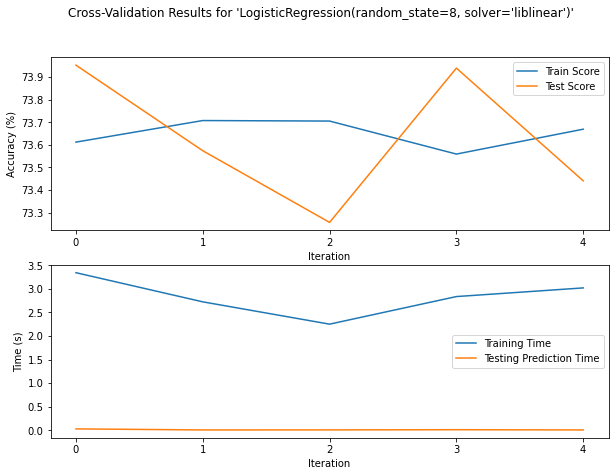

[Testing]  Accuracy Mean       (%) = 73.633
[Testing]  Accuracy Std Dev    (%) = 0.275
[Testing]  Execution Time Mean (s) = 0.012
[Training] Execution Time Mean (s) = 2.834
-----------------------------------------------------------------------------------------


In [7]:
# Configure Logistic Regression model and invoke cross_validation function
lr_clf = linear_model.LogisticRegression(solver='liblinear', random_state=8)
cross_validation(lr_clf)

As we can observe above, the logistic regression model obtains a **mean accuracy of 73.633%** with a standard deviation of 0.275% for the 5 iterations. This relatively low deviation indicates the model is generalizing relatively well even when changing the data used for training and validation. Besides, the training and testing score are very similar for all the iterations (difference less than 1%) which indicates the model is not overfitted.

The logistic regression model had an average training execution time of 2.834 seconds for the 129718 instances used for this purpose (21.84 $\mu s$ per instance) and an average prediction execution time of 0.012 seconds for the 32430 instances used for this purpose (370 $ns$ per instance).

As a next step, we proceed to use Grid-Search combined with cross-validation to tweak the main hyper-parameters and attempt to improve the performance of the model. In this case we experiment with changing the solver used for optimization and the *C* value which controls the regularization (inversely proportional). As we can observe below, the best result is obtained with a *'newton-cg'* solver and $C=10$. However, the **obtained average accuracy of 73.642% has an almost neglectable gain improvement over the accuracy of 73.633% obtained previously.**

**Note**: Be aware that the grid search algorithm below will have to execute training and validation 45 iterations. This will take between 3 and 6 minutes depending on the computer's performance.

In [8]:
# Now let's use Grid-Search to attempt to find a good combination of hyper-parameters
lr_param_grid = {
    'solver': ['liblinear', 'sag', 'newton-cg'],
    'C': [0.1, 1, 10],
    'random_state': [8]
}
lr_clf = linear_model.LogisticRegression()
best_lr_clf = grid_search_cv(lr_clf, lr_param_grid)

 >>> Running Grid-Search with CV for model 'LogisticRegression()' ...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.4min finished


 << Grid-Search Results >>
Best Parameters Combination: {'C': 10, 'random_state': 8, 'solver': 'newton-cg'}
Best Accuracy Score:         (%) = 73.642


Finally, we proceed to generate different metrics for the optimized model we just obtained based on logistic regression. Below we can observe the confusion matrix and the rest of the metrics in a table. From the recall and specificity we can see that the model performs slightly better determining the 'Severe' accidents than the 'Non-Severe' (75.172% vs 72.528%).

**Note:** These metrics are obtained in a single iteration of testing with a 20% of the instances in the dataset. For more details see the *generate_metrics* function.

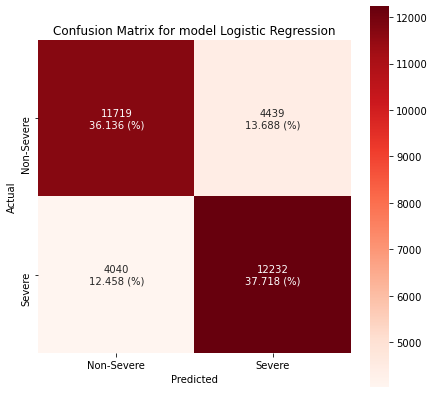

,Model Name,Accuracy (%),Recall (%),Specificity (%),Precision (%),F1 Score (%)
0,Logistic Regression,73.854,75.172,72.528,73.373,74.262


In [9]:
# Now let's generate metrics results for the best model obtained
best_lr_clf_metrics = generate_metrics(best_lr_clf, "Logistic Regression")
create_metrics_table([best_lr_clf_metrics])

### Linear SVM

Next, we evaluate a linear Support Vector Machine (SVM) model. Below we configure this model with dual disabled since in this case we have more instances than features and a fixed random state to obtain reproducible results. As before, we will use our generic *cross_validation* function to obtain the results below:

In [10]:
# Import required SVM module
from sklearn import svm

-----------------------------------------------------------------------------------------
 >>> Running Cross-Validation for model 'LinearSVC(dual=False, random_state=8)' ...


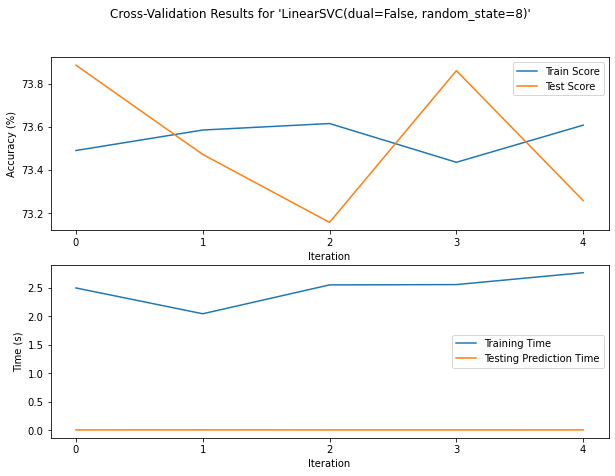

[Testing]  Accuracy Mean       (%) = 73.527
[Testing]  Accuracy Std Dev    (%) = 0.300
[Testing]  Execution Time Mean (s) = 0.007
[Training] Execution Time Mean (s) = 2.483
-----------------------------------------------------------------------------------------


In [11]:
# Configure Linear SVM model and invoke cross_validation function
lsvm_clf = svm.LinearSVC(dual=False, random_state=8)
cross_validation(lsvm_clf)

As we can observe above, the linear SVM model obtains a **mean accuracy of 73.527%** with a standard deviation of 0.300% for the 5 iterations. These results are very similar to the results obtained with the also linear model based on logistic regression. The same comments apply, little variation when changing the data used for testing and model not overfitted.

The linear SVM model had an average training execution time of 2.483 seconds for the 129718 instances used for this purpose (19.14 $\mu s$ per instance) and an average prediction execution time of 0.007 seconds for the 32430 instances used for this purpose (216 $ns$ per instance). This model was a little faster than the linear regression for both, training and prediction.

We proceed to use Grid-Search combined with cross-validation to tweak the main hyper-parameters and attempt to improve the performance of the model. In this case we experiment with changing the loss function used used for optimization, the *C* value which controls the regularization and dual enabled or disabled (primal optimization). As we can observe below, the best result is obtained with a *'squared_hinge'* loss function, $C=10$ and dual disabled. The only change from the previous run was the decrease in regularization but again the improvement was very small (0.01%).

**Note**: Be aware that the grid search algorithm below will have to execute training and validation 60 iterations. This will take between 5 and 10 minutes depending on the computer's performance.

In [12]:
# Now let's use Grid-Search to attempt to find a good combination of hyper-parameters
lsvm_clf_param_grid = {
    'loss': ['hinge', 'squared_hinge'],
    'C': [0.1, 1, 10],
    'dual': [True, False],
    'random_state': [8]
}
best_lsvm_clf = grid_search_cv(svm.LinearSVC(), lsvm_clf_param_grid)

 >>> Running Grid-Search with CV for model 'LinearSVC()' ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.9min finished


 << Grid-Search Results >>
Best Parameters Combination: {'C': 10, 'dual': False, 'loss': 'squared_hinge', 'random_state': 8}
Best Accuracy Score:         (%) = 73.537


Finally, we proceed to generate different metrics for the optimized model we just obtained based on linear SVM. Below we can observe the confusion matrix and the rest of the metrics in a table. The same as with Logistic Regression, the model performs slightly better determining the 'Severe' accidents than the 'Non-Severe' (75.516% vs 71.940%). From the comparison with Logistic Regression, we cannot distinguish a clear winner since their results are very similar for all the metrics.

**Note:** These metrics are obtained in a single iteration of testing with a 20% of the instances in the dataset. For more details see the *generate_metrics* function.

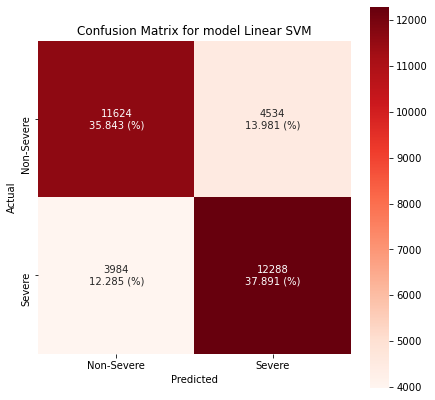

,Model Name,Accuracy (%),Recall (%),Specificity (%),Precision (%),F1 Score (%)
0,Logistic Regression,73.854,75.172,72.528,73.373,74.262
1,Linear SVM,73.734,75.516,71.940,73.047,74.261


In [13]:
# Now let's generate metrics results for the best model obtained
best_lsvm_clf_metrics = generate_metrics(best_lsvm_clf, "Linear SVM")
create_metrics_table([best_lr_clf_metrics, best_lsvm_clf_metrics])

### Naive Bayes

Next, we evaluate a Gaussian Naive Bayes model. As before, we will use our generic *cross_validation* function to obtain the results below:

In [15]:
# Import naive_bayes module
from sklearn import naive_bayes

-----------------------------------------------------------------------------------------
 >>> Running Cross-Validation for model 'GaussianNB()' ...


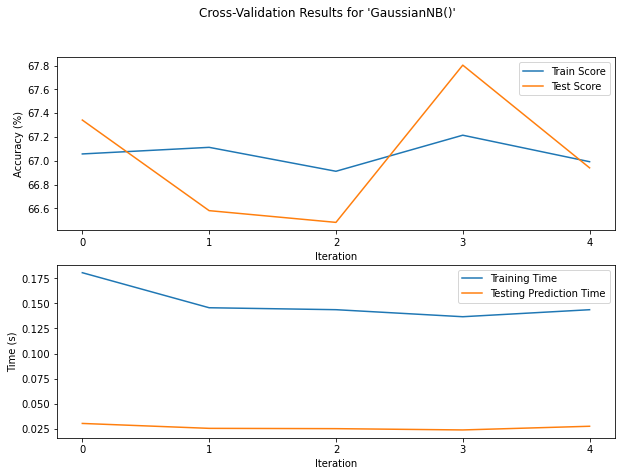

[Testing]  Accuracy Mean       (%) = 67.030
[Testing]  Accuracy Std Dev    (%) = 0.491
[Testing]  Execution Time Mean (s) = 0.027
[Training] Execution Time Mean (s) = 0.150
-----------------------------------------------------------------------------------------


In [16]:
# Configure Gaussing Naive-Bayes model and invoke cross_validation function
nb_clf = naive_bayes.GaussianNB()
cross_validation(nb_clf)

As we can observe above, the Gaussian Naive Bayes model obtains a **mean accuracy of 67.030%** with a standard deviation of 0.491% for the 5 iterations. This accuracy result is at least 6% below the values obtained for Logistic Regression and Linear SVM. The standard variation is a little greater than in the previous models but still low enough to consider the model stable against changes in the data used for validation. Training and testing score are still very similar to consider the model non overfitted. 

The Gaussian Naive Bayes model had an average training execution time of 0.150 seconds for the 129718 instances used for this purpose (1.15 $\mu s$ per instance) and an average prediction execution time of 0.027 seconds for the 32430 instances used for this purpose (836 $ns$ per instance). This model was considerable faster to train (20x) but slower to predict (4x) than the linear models studied above.

The same as before, we proceed to use Grid-Search combined with cross-validation. In this case we only experiment with changing the *'var_smoothing'* which is used for calculation stability. As we can observe below, the best result is obtained with $var\_smoothing=1e-5$. This change did provide a relatively considerable improvement in the accuracy of the model of around 2.4%.

In [17]:
# Now let's use Grid-Search to attempt to find a good combination of hyper-parameters
nb_clf_param_grid = {
    'var_smoothing': [1e-3, 1e-5, 1e-7, 1e-9, 1e-11]
}
best_nb_clf = grid_search_cv(nb_clf, nb_clf_param_grid)

 >>> Running Grid-Search with CV for model 'GaussianNB()' ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.6s finished


 << Grid-Search Results >>
Best Parameters Combination: {'var_smoothing': 1e-05}
Best Accuracy Score:         (%) = 69.431


Finally, we proceed to generate different metrics for the optimized model we just obtained based on Gaussian Naive Bayes. Below we can observe the confusion matrix and the rest of the metrics in a table. As opposed to the linear models, the model performs considerably better determining the 'Non-Severe' accidents than the 'Severe' (75.832% of specificity vs 63.219% of recall). In general, this model performs worse than the linear models mainly due to its inability to correctly identify the 'Severe' instances as such (low recall).

**Note:** These metrics are obtained in a single iteration of testing with a 20% of the instances in the dataset. For more details see the *generate_metrics* function.

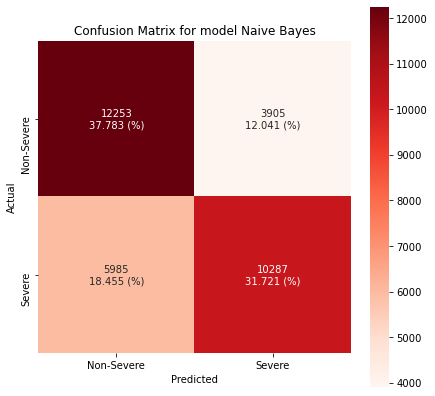

,Model Name,Accuracy (%),Recall (%),Specificity (%),Precision (%),F1 Score (%)
0,Logistic Regression,73.854,75.172,72.528,73.373,74.262
1,Linear SVM,73.734,75.516,71.940,73.047,74.261
2,Naive Bayes,69.504,63.219,75.832,72.484,67.535


In [18]:
# Now let's generate metrics results for the best model obtained
best_nb_clf_metrics = generate_metrics(best_nb_clf, "Naive Bayes")
create_metrics_table([best_lr_clf_metrics, best_lsvm_clf_metrics, best_nb_clf_metrics])

### Decision Trees

We will now evaluate a decision tree model. Below we configure this model with a maximum depth of 8 to avoid overfitting and a fixed random state to obtain reproducible results. The results obtained with our *cross_validation* function are presented below:

In [19]:
# Import tree module
from sklearn import tree

-----------------------------------------------------------------------------------------
 >>> Running Cross-Validation for model 'DecisionTreeClassifier(max_depth=8, random_state=8)' ...


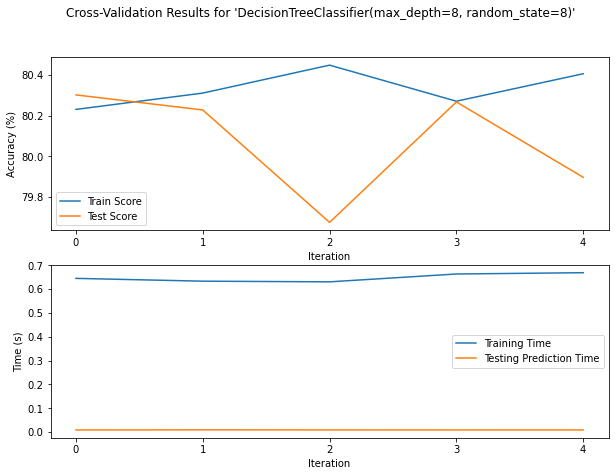

[Testing]  Accuracy Mean       (%) = 80.074
[Testing]  Accuracy Std Dev    (%) = 0.246
[Testing]  Execution Time Mean (s) = 0.009
[Training] Execution Time Mean (s) = 0.648
-----------------------------------------------------------------------------------------


In [20]:
# Configure Binary Tree model and invoke cross_validation function
bt_clf = tree.DecisionTreeClassifier(max_depth=8, random_state=8)
cross_validation(bt_clf)

As we can observe above, the Decision Tree classifier obtains a **mean accuracy of 80.074%** with a standard deviation of 0.246% for the 5 iterations. This accuracy result represents a significant improvement of at least 6% for the linear models of Logistic Regression and SVM. The standard deviation is maintained low and with a small variation in the score for training versus testing data, which indicates the model is non overfitted.

The Decision Tree model had an average training execution time of 0.648 seconds for the 129718 instances used for this purpose (5 $\mu s$ per instance) and an average prediction execution time of 0.009 seconds for the 32430 instances used for this purpose (278 $ns$ per instance). This model was faster to train (4x) and almost as fast for the predictions in comparison with the linear models presented above.

We proceed to use Grid-Search combined with cross-validation to attempt to improve the performance of the model. In this case we experiment with changing the function used to measure the quality of a split (‘criterion’), and multiple parameters that are intended to help avoiding overfit (maximum tree depth, maximum nodes per lean, minimum samples per leaf). As we can observe below, the best result is obtained with a *' gini * quality function, maximum depth of 11, maximum leaf nodes of 100 and minimum samples per leaf of 1. However, this configuration only results in a small improvement of accuracy of around 0.1%.

**Note**: Be aware that the grid search algorithm below will have to execute training and validation 270 iterations. This will take between 1 and 3 minutes depending on the computer's performance.

In [21]:
# Now let's use Grid-Search to attempt to find a good combination of hyper-parameters
bt_clf_param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 8, 11],
    'max_leaf_nodes': [50, 100, None],
    'min_samples_leaf': [1, 5, 7],
    'random_state': [8]
}
best_bt_clf = grid_search_cv(tree.DecisionTreeClassifier(), bt_clf_param_grid)

 >>> Running Grid-Search with CV for model 'DecisionTreeClassifier()' ...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.6min finished


 << Grid-Search Results >>
Best Parameters Combination: {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'random_state': 8}
Best Accuracy Score:         (%) = 80.195


As we did before, we proceed to generate different metrics for the optimized model we just obtained based on Decision Trees. Below we can observe the confusion matrix and the rest of the metrics in a table. The same to the linear models, the model performs considerably better determining the 'Severe' accidents than the 'Non-Severe' (89.559% of recall vs 71.599% of specificity). In general, this model performs considerably better than the linear models thanks to its ability to correctly predict ‘Severe’ accidents (high recall).

**Note:** These metrics are obtained in a single iteration of testing with a 20% of the instances in the dataset. For more details see the *generate_metrics* function.

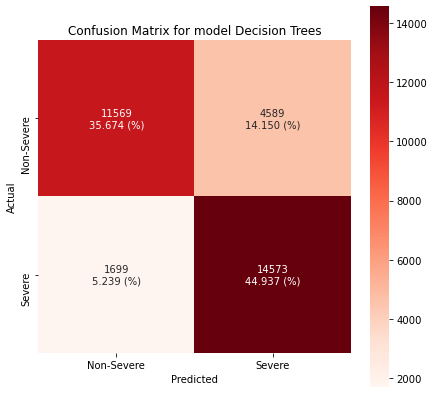

,Model Name,Accuracy (%),Recall (%),Specificity (%),Precision (%),F1 Score (%)
0,Logistic Regression,73.854,75.172,72.528,73.373,74.262
1,Linear SVM,73.734,75.516,71.940,73.047,74.261
2,Naive Bayes,69.504,63.219,75.832,72.484,67.535
3,Decision Trees,80.611,89.559,71.599,76.052,82.254


In [22]:
# Now let's generate metrics results for the best model obtained
best_bt_clf_metrics = generate_metrics(best_bt_clf, "Decision Trees")
create_metrics_table([best_lr_clf_metrics, best_lsvm_clf_metrics, best_nb_clf_metrics, 
                      best_bt_clf_metrics])

Before finishing with the Decision Tree classifier, we proceed to plot below the features of the dataset that represent greater importance for the prediction. Key observations:


- The daylight present and dry surfaces are good predictors. Most likely non-severe accidents are associated with these values being 1.

- The hour of the day is also a good predictor. There is a chance that certain hours are mostly associated with severe accidents (most likely at night).

- The speed limit is also a good predictor. Most likely streets with hish-speed limits are associated with severe accidents.

- The urban feature is also a good predictor. Most likely non-urban locations are associated with severe accidents.

In [23]:
def plot_feature_importances(model, threshold=0.005):
    imps = []
    imp_names = []
    for imp, imp_name in zip(model.feature_importances_, features.columns):
        if imp > threshold:
            imps.append(imp)
            imp_names.append(imp_name)
        
    n_features = len(imp_names)
    plt.barh(range(n_features), imps, align='center')
    plt.yticks(np.arange(n_features), imp_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

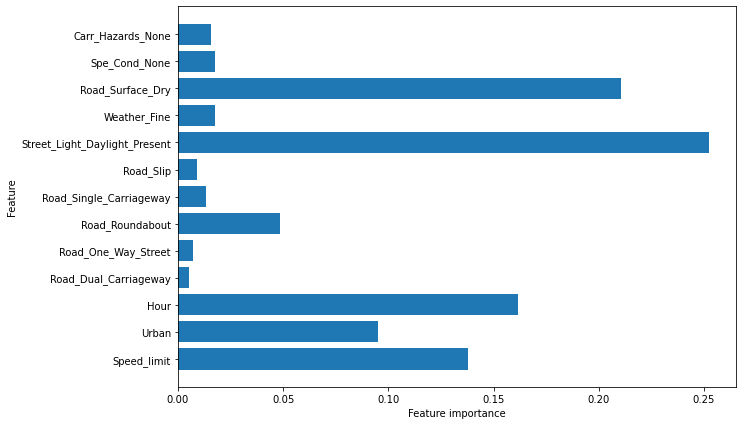

In [24]:
# Plot feature importances for Decision Tree classifier with best hyper-parameters
plot_feature_importances(best_bt_clf)

### Random Forest

In [25]:
# Import required ensemble module
from sklearn import ensemble

-----------------------------------------------------------------------------------------
 >>> Running Cross-Validation for model 'RandomForestClassifier(max_depth=8, n_estimators=10, random_state=8)' ...


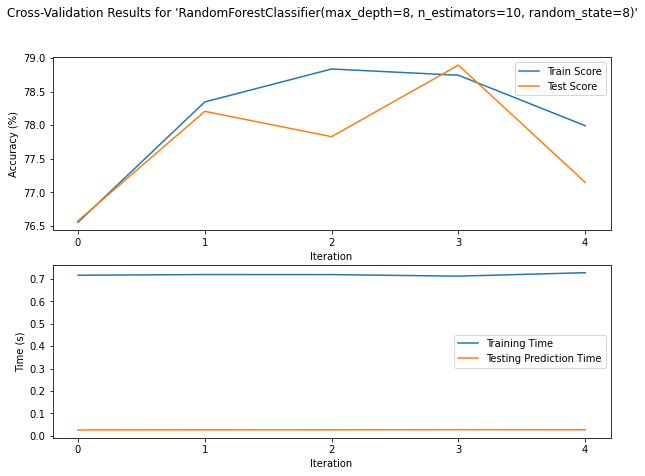

[Testing]  Accuracy Mean       (%) = 77.731
[Testing]  Accuracy Std Dev    (%) = 0.806
[Testing]  Execution Time Mean (s) = 0.027
[Training] Execution Time Mean (s) = 0.719
-----------------------------------------------------------------------------------------


In [26]:
# Configure Random-Forest model and invoke cross_validation function
rf_clf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=8, random_state=8)
cross_validation(rf_clf)

In [27]:
# Now let's use Grid-Search to attempt to find a good combination of hyper-parameters
rf_clf_param_grid = {
    'criterion': ["gini"],
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 8, 11],
    'max_leaf_nodes': [100, None],
    'min_samples_leaf': [1, 5],
    'random_state': [8]
}
best_rf_clf = grid_search_cv(ensemble.RandomForestClassifier(), rf_clf_param_grid)

 >>> Running Grid-Search with CV for model 'RandomForestClassifier()' ...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.1min finished


 << Grid-Search Results >>
Best Parameters Combination: {'criterion': 'gini', 'max_depth': 11, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 150, 'random_state': 8}
Best Accuracy Score:         (%) = 79.876


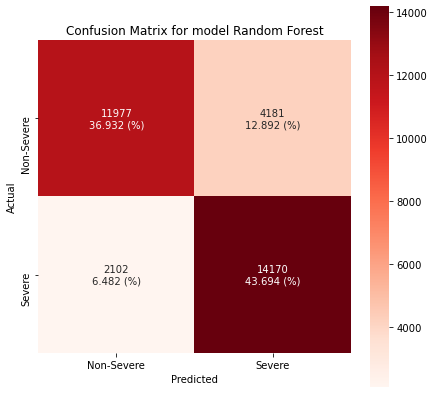

,Model Name,Accuracy (%),Recall (%),Specificity (%),Precision (%),F1 Score (%)
0,Logistic Regression,73.854,75.172,72.528,73.373,74.262
1,Linear SVM,73.734,75.516,71.940,73.047,74.261
2,Naive Bayes,69.504,63.219,75.832,72.484,67.535
3,Decision Trees,80.611,89.559,71.599,76.052,82.254
4,Random Forest,80.626,87.082,74.124,77.217,81.853


In [28]:
# Now let's generate metrics results for the best model obtained
best_rf_clf_metrics = generate_metrics(best_rf_clf, "Random Forest")
create_metrics_table([best_lr_clf_metrics, best_lsvm_clf_metrics, best_nb_clf_metrics, 
                      best_bt_clf_metrics, best_rf_clf_metrics])

### Another Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
cross_validation(AdaBoostClassifier(n_estimators=100))